## Content Based Recommendation

What is a Content Based Recommendation?

Content-based Filtering is a ML-technique that uses similarities in features to make decisions. It is often used in recommendation systems, which are algorithms designed to advertise or recommend things to users based on knowledge accumulated about the user.  It is only capable of suggesting movies which are close to a certain movie.


Also, the system that we built is not really personal. It doesn't capture the personal tastes and biases of a user. Anyone asking the system for recommendations based on a movie will receive the same recommendations for that movie, regardless of the gender or person.

In [1]:
# Import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting graphs
import seaborn as sns # plotting graphs
import ast
import nltk # NLP 
from nltk.corpus import stopwords # remove stopwords

### Import the data from github

In [2]:
metadata = pd.read_csv('https://raw.githubusercontent.com/jiyeon1997/movie-recommender-python/master/movies_metadata.csv', low_memory=False)
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
metadata.dropna()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,...,1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",...,1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,...,1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44274,False,"{'id': 173710, 'name': 'Planet of the Apes (Re...",152000000,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",http://www.foxmovies.com/movies/war-for-the-pl...,281338,tt3450958,en,War for the Planet of the Apes,Caesar and his apes are forced into a deadly c...,...,2017-07-11,369907963.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,For freedom. For family. For the planet.,War for the Planet of the Apes,False,6.7,1675.0
44674,False,"{'id': 476961, 'name': 'Goon Collection', 'pos...",0,"[{'id': 35, 'name': 'Comedy'}]",https://www.facebook.com/GoonFilm/?fref=ts,336890,tt2417712,en,Goon: Last of the Enforcers,"During a pro lockout, Doug ""The Thug"" Glatt is...",...,2017-03-17,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Glatt's Back!,Goon: Last of the Enforcers,False,6.0,35.0
44821,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,...,2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,144.0
44842,False,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,335988,tt3371366,en,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",...,2017-06-21,604942143.0,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",Transformers: The Last Knight,False,6.2,1440.0


In [4]:
metadata.shape

(45466, 24)

In [5]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
len(metadata)

45466

In [8]:
metadata['genre'] = metadata['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])

In [9]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]"
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]"
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,[Comedy]


In [10]:
print(metadata.production_countries)

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object


In [11]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [12]:
metadata.drop(columns=['genres'])

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]"
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]"
3,False,NaN,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]"
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,[Comedy]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,"[Drama, Family]"
45462,False,NaN,0,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,[Drama]
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,"[Action, Drama, Thriller]"
45464,False,NaN,0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,[]


In [13]:
metadata=metadata.dropna(subset=['production_countries'])

In [14]:
metadata['production_countries'][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [15]:
metadata['countries'] = metadata['production_countries'].apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else x)

In [16]:
metadata['countries']=metadata['countries'].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
metadata['countries'].head(4)

0    United States of America
1    United States of America
2    United States of America
3    United States of America
Name: countries, dtype: object

In [17]:
metadata['countries'].value_counts()

United States of America                17851
                                         6282
United Kingdom                           2238
France                                   1654
Japan                                    1356
                                        ...  
Australia,South Africa                      1
Romania,United Kingdom,Canada               1
Finland,Germany,Netherlands                 1
France,Denmark,Spain,Sweden                 1
Egypt,Italy,United States of America        1
Name: countries, Length: 2393, dtype: int64

In [18]:
metadata['languages'] = metadata['spoken_languages'].dropna().apply(lambda x: [i['name'] for i in ast.literal_eval(x)])

In [19]:
metadata['languages'].apply(lambda x: ",".join(x) if isinstance(x, list) else x).value_counts()

English                           22395
                                   3952
Français                           1853
日本語                                1289
Italiano                           1218
                                  ...  
Deutsch,,ελληνικά,English             1
English,suomi,Deutsch,svenska         1
English,Français,Deutsch,فارسی        1
svenska,English,Español               1
Fulfulde,English                      1
Name: languages, Length: 1842, dtype: int64

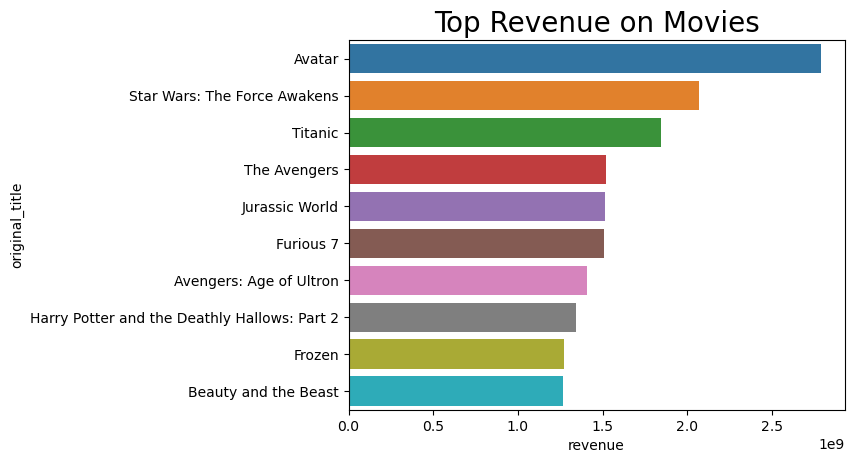

In [20]:
sns.barplot(y='original_title', x = 'revenue', data=metadata.sort_values(by=['revenue'],ascending=False)[0:10])
plt.title('Top Revenue on Movies', fontsize = 20);

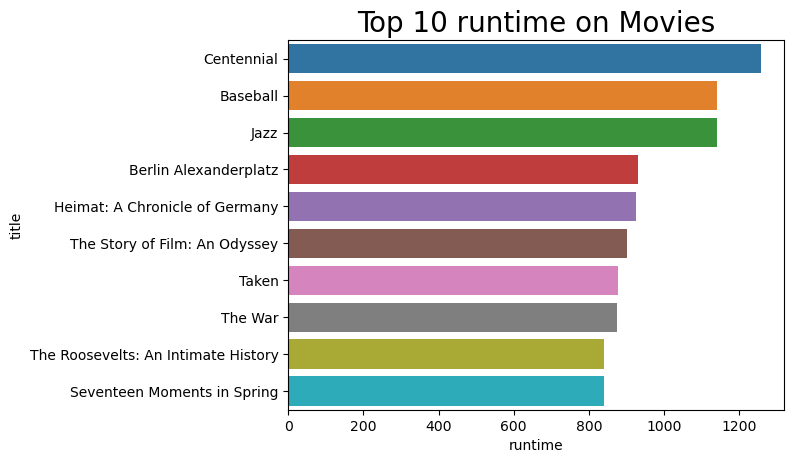

In [21]:
sns.barplot(y='title', x = 'runtime', data=metadata.sort_values(by=['runtime'],ascending=False)[0:10])
plt.title('Top 10 runtime on Movies', fontsize = 20);

In [22]:
metadata.isnull().sum()

adult                        0
belongs_to_collection    40970
budget                       0
genres                       0
homepage                 37682
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   2
poster_path                383
production_companies         0
production_countries         0
release_date                84
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25051
title                        3
video                        3
vote_average                 3
vote_count                   3
genre                        0
countries                    0
languages                    3
dtype: int64

In [23]:
df=metadata.dropna(subset=['title'])

In [24]:
df.shape

(45460, 27)

In [25]:
#Create a dataframe with three columns only

df= df[['title', 'overview', 'genre']]

In [26]:
df.head()

,title,overview,genre
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]"
1,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy]


In [27]:
# Null data
df.isnull().sum()

title         0
overview    954
genre         0
dtype: int64

In [28]:
df.shape

(45460, 3)

In [29]:
df['genre']=df['genre'].apply(lambda x: ",".join(x) if isinstance(x, list) else x)

In [30]:
df.head()

,title,overview,genre
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","Animation,Comedy,Family"
1,Jumanji,When siblings Judy and Peter discover an encha...,"Adventure,Fantasy,Family"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,"Romance,Comedy"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","Comedy,Drama,Romance"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,Comedy


In [31]:
#There are duplicate titles in the data
df.title.value_counts().loc[lambda x: x>=2]

Cinderella                     11
Hamlet                          9
Alice in Wonderland             9
Beauty and the Beast            8
Les Misérables                  8
                               ..
Nothing Personal                2
The Shaggy Dog                  2
Kidnapping, Caucasian Style     2
A Farewell to Arms              2
The Black Room                  2
Name: title, Length: 2330, dtype: int64

In [32]:
# drop the title which are duplicated
data=df.drop_duplicates(subset='title', keep='first').reset_index(drop=True)
data.head()

,title,overview,genre
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","Animation,Comedy,Family"
1,Jumanji,When siblings Judy and Peter discover an encha...,"Adventure,Fantasy,Family"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,"Romance,Comedy"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","Comedy,Drama,Romance"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,Comedy


In [33]:
data=data.dropna(subset=['overview'])

In [34]:
data.isnull().sum()

title       0
overview    0
genre       0
dtype: int64

In [35]:
data.head()

,title,overview,genre
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","Animation,Comedy,Family"
1,Jumanji,When siblings Judy and Peter discover an encha...,"Adventure,Fantasy,Family"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,"Romance,Comedy"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","Comedy,Drama,Romance"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,Comedy


In [36]:
#Remove the stopwords
stop = stopwords.words('english')

In [37]:
data['overview'] = data['overview'].str.replace(r'[^\w\s]+', '', regex=True)

In [38]:
data['overview'] = data['overview'].str.lower().str.split()

In [39]:
# Exclude stopwords 
data['cleaned_overview'] = data['overview'].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))

In [40]:
data.head()

,title,overview,genre,cleaned_overview
0,Toy Story,"[led, by, woody, andys, toys, live, happily, i...","Animation,Comedy,Family",led woody andys toys live happily room andys b...
1,Jumanji,"[when, siblings, judy, and, peter, discover, a...","Adventure,Fantasy,Family",siblings judy peter discover enchanted board g...
2,Grumpier Old Men,"[a, family, wedding, reignites, the, ancient, ...","Romance,Comedy",family wedding reignites ancient feud nextdoor...
3,Waiting to Exhale,"[cheated, on, mistreated, and, stepped, on, th...","Comedy,Drama,Romance",cheated mistreated stepped women holding breat...
4,Father of the Bride Part II,"[just, when, george, banks, has, recovered, fr...",Comedy,george banks recovered daughters wedding recei...


In [41]:
data.shape

(41362, 4)

In [42]:
indices = pd.Series(data.index, index=data['title'])
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Caged Heat 3000                42272
Subdue                         42273
Century of Birthing            42274
Satan Triumphant               42275
Queerama                       42276
Length: 41362, dtype: int64

In [43]:
def get_recommendations(title, cosine_sim, indices):
    # Get the index of the movie that matches the title
    idx = indices[title]
    # Get the pairwsie similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(data['cleaned_overview'])

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
# Input the movie name
x=input('Movie name is: ')
print(get_recommendations(x, cosine_sim, indices))